## M345SC 2019 Lab 6

### Task 1: Simulating random walks

The simplest representation of 1-D random walks can be expressed as: $$X_{i+1} = X_i + R_i$$
where $R_i$ is a random number which is either +1 or -1 with equal probability (i.e. it represents a coin flip). This can be implemented in Python in a straightforward manner in Python iterating forward in time and using np.random.choice to carry out the coin flip each step:

In [1]:
import numpy as np
import matplotlib.pyplot as plt


Nt = 100 #number of iterations
x = np.zeros(Nt+1)

#1 Nt-step random walk
for i in range(Nt):
    x[i+1] = x[i] + np.random.choice((-1,1))

#Display walk
plt.figure()
plt.plot(x,'x--')
plt.xlabel('i')
plt.ylabel('$x_i$')
plt.title("A single random walk")
plt.show()


<Figure size 640x480 with 1 Axes>

Ultimately, a single random walk has little meaning, and we need to compute averages over several walks: 

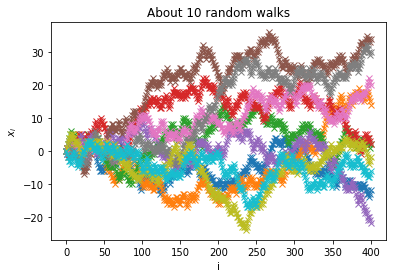

dt=0.700512


In [14]:
from time import time
import numpy as np
def rwalk(Nt=400,M=500,display=False):
    """Compute M Nt-step 1-D random walks
    """
    x = np.zeros((Nt+1,M))

    t1 = time()
    #M Nt-step random walks
    for j in range(M):
        for i in range(Nt):
            x[i+1,j] = x[i,j] + np.random.choice((-1,1))

    t2 = time()
    dt = t2-t1    
        
    if display:
        #Display walk
        plt.figure()
        plt.plot(x[:,::M//min(10,M)],'x--')
        plt.xlabel('i')
        plt.ylabel('$x_i$')
        plt.title("About %d random walks" %(min(10,M)))
        plt.show()
        
    return x,dt
out = rwalk(display=True)
print("dt=%f" %out[1])

The function above is extremely inefficient for large M and Nt.
When working with arrays, it is essential to avoid loops and use built-in functions/methods whenever possible. Modify *rwalk* below so that it: 1) Pre-computes all needed random numbers and stores them in an array before computing the random walks and 2) the loop over M walks is removed and all M walks are simultaneously updated with each step of i:

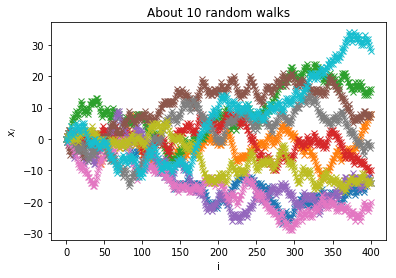

dt=0.006869


In [15]:
from time import time
def rwalk2(Nt=400,M=500,display=False):
    """Compute M Nt-step 1-D random walks
    """
    x = np.zeros((Nt+1,M))

    t1 = time()
    
    #**Modify code below and add code here**
    random = np.random.choice((-1,1), size=(Nt+1,M))
    #M Nt-step random walks
    for i in range(Nt):
        x[i+1,:] = x[i,:] + random[i,:]

    t2 = time()
    dt = t2-t1    
        
    if display:
        #Display walk
        plt.figure()
        plt.plot(x[:,::M//min(10,M)],'x--')
        plt.xlabel('i')
        plt.ylabel('$x_i$')
        plt.title("About %d random walks" %(min(10,M)))
        plt.show()
        
    return x,dt
out = rwalk2(display=True)
print("dt=%f" %out[1])

How much faster is your new function?

Now, compute the mean and standard deviation of $x_i$ across the M-samples. You should be able to compute this without using any loops, and you should find that the standard deviation increases as $\sqrt{i}$

In [16]:
#Add code here
print("Mean =",np.mean(x)) 
print("Standard Deviation=", np.std(x))

Mean = -2.8118811881188117
Standard Deviation= 3.1456802733150333


### Task 2: Practice with arrays, eigenvalues and eigenvectors

1) Use the *np.random.rand* function to generate a 3 x 3 matrix, N 

In [18]:
import numpy as np
#Add code here
N = np.random.rand(3,3)
print("N=", N)

N= [[0.28745132 0.90368526 0.05687632]
 [0.53966428 0.14449156 0.66206968]
 [0.12083516 0.20869302 0.94076908]]


2) Compute the eigenvalues and eigenvectors of N:

In [19]:
#Add code here
evals,evecs = np.linalg.eig(N)
print("Eigenvalues of N=", evals)
print("Eigenvectors of N=",evecs)

Eigenvalues of N= [-0.5030691   0.59028877  1.2854923 ]
Eigenvectors of N= [[ 0.75125377 -0.82839485  0.57251858]
 [-0.65921719 -0.30709078  0.59692168]
 [ 0.03241094  0.46846262  0.56205603]]


3) Verify that $\textrm{det}(N-\lambda_1 I)=0$ where $\lambda_1$ is the first eigenvalue of N:

In [35]:
#Add code here
np.round(np.linalg.det(N-evals[0]*np.identity(3)),7)==0

True

4) Verify that $N v_1 = \lambda_1 v_1$ where $v_1$ is the first eigenvector of N:

In [36]:
#Add code here
np.round(N*evecs[:,0],7)==np.round(evals[0]*evecs[:,0],7)

array([[False, False, False],
       [False, False, False],
       [False, False, False]])